In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Mobile_Sales_df=pd.read_csv("Sales.csv")

In [3]:
Mobile_Sales_df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling_Price,Original_Price,Mobile,Discount,discount_percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


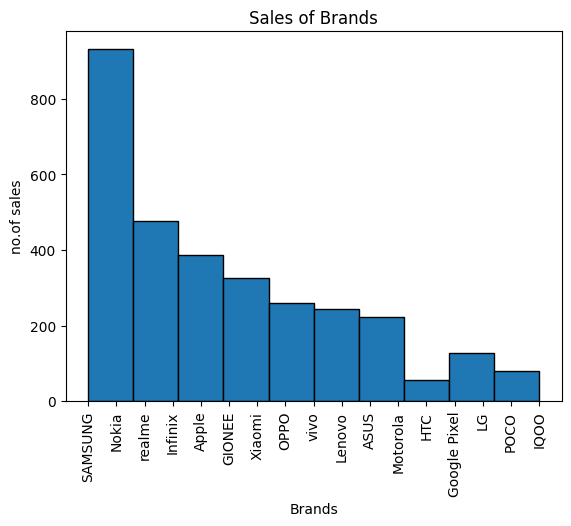

In [4]:
plt.hist(Mobile_Sales_df.Brands,edgecolor="black")
plt.title("Sales of Brands")
plt.xlabel("Brands")
plt.ylabel("no.of sales")
plt.xticks(rotation=90);

In [5]:
def convert_size_to_gb(size_str):
    if pd.isna(size_str):
        return None  # Return None for NaN values

    size_str = size_str.upper().strip()  # Normalize case and whitespace

    try:
        if 'GB' in size_str:
            return float(size_str.replace('GB', '').strip())
        elif 'MB' in size_str:
            return float(size_str.replace('MB', '').strip()) / 1024
        elif 'KB' in size_str:
            return float(size_str.replace('KB', '').strip()) / (1024 * 1024)
        elif 'TB' in size_str:
            return float(size_str.replace('TB', '').strip()) * 1024
        else:
            return None  # Handle unexpected formats
    except ValueError:
        return None  # Handle conversion errors safely

# Ensure Mobile_Sales_df is a copy to avoid slicing issues
Mobile_Sales_df = Mobile_Sales_df.copy()

# Apply conversion using .loc[]
Mobile_Sales_df.loc[:, 'Storage'] = Mobile_Sales_df['Storage'].apply(convert_size_to_gb)
Mobile_Sales_df.loc[:, 'Memory'] = Mobile_Sales_df['Memory'].apply(convert_size_to_gb)

# Drop rows with NaN values in either column
Mobile_Sales_df.dropna(subset=['Storage', 'Memory'], inplace=True)

# Convert to integers (rounding values as needed)
Mobile_Sales_df.loc[:, 'Storage'] = Mobile_Sales_df['Storage'].round().astype(int)
Mobile_Sales_df.loc[:, 'Memory'] = Mobile_Sales_df['Memory'].round().astype(int)

Mobile_Sales_df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling_Price,Original_Price,Mobile,Discount,discount_percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8,128,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2,16,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4,64,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4,64,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,0,0,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3108,SAMSUNG,Metro 313,Black,0,0,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6,128,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3111,Apple,iPhone SE,White,2,128,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6,128,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [6]:
Mobile_Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3015 non-null   object 
 1   Models               3015 non-null   object 
 2   Colors               3015 non-null   object 
 3   Memory               3015 non-null   object 
 4   Storage              3015 non-null   object 
 5   Camera               3015 non-null   object 
 6   Rating               2880 non-null   float64
 7   Selling_Price        3015 non-null   int64  
 8   Original_Price       3015 non-null   int64  
 9   Mobile               3015 non-null   object 
 10  Discount             3015 non-null   int64  
 11  discount_percentage  3015 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 306.2+ KB


In [7]:
Mobile_Sales_df['discount_percentage']=Mobile_Sales_df['discount_percentage'].astype(int)
print(Mobile_Sales_df.dtypes)

Brands                  object
Models                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling_Price            int64
Original_Price           int64
Mobile                  object
Discount                 int64
discount_percentage      int64
dtype: object


In [8]:
Mobile_Sales_df.columns

Index(['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating',
       'Selling_Price', 'Original_Price', 'Mobile', 'Discount',
       'discount_percentage'],
      dtype='object')

In [9]:
Mobile_Sales_df.describe()

,Rating,Selling_Price,Original_Price,Discount,discount_percentage
count,2880.000000,3015.000000,3015.000000,3015.000000,3015.000000
mean,4.243229,26314.938640,28252.515091,1937.576451,5.985738
std,0.271890,29323.981097,30874.554030,5414.380661,11.060676
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.000000
25%,4.100000,9999.000000,10499.000000,0.000000,0.000000
50%,4.300000,15490.000000,16990.000000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.000000
max,5.000000,179900.000000,189999.000000,75000.000000,70.000000


In [10]:
Brand_Rating_df=Mobile_Sales_df.groupby("Brands")[['Rating']].mean().round(2)

Brand_Rating_df.sort_values("Rating")

,Rating
Brands,
GIONEE,3.85
HTC,3.97
LG,3.98
Lenovo,3.98
Nokia,4.01
ASUS,4.08
Motorola,4.14
SAMSUNG,4.21
Infinix,4.28


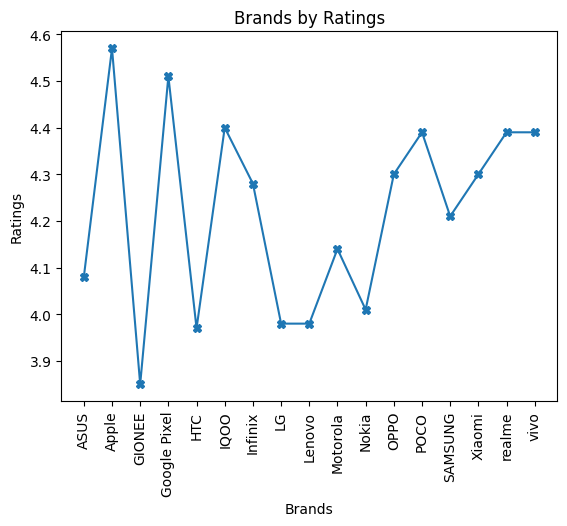

In [11]:
plt.plot(Brand_Rating_df,marker="X")
plt.title("Brands by Ratings")
plt.xlabel("Brands")
plt.ylabel("Ratings")

plt.xticks(rotation=90);

In [12]:
Brand_Sales_df=Mobile_Sales_df.groupby("Brands")[['Selling_Price', 'Original_Price']].mean().round(0)
Brand_Sales_df


,Selling_Price,Original_Price
Brands,,
ASUS,20327.0,21585.0
Apple,80002.0,83076.0
GIONEE,7135.0,7819.0
Google Pixel,61392.0,62012.0
HTC,28314.0,28314.0
IQOO,37190.0,40990.0
Infinix,11092.0,12018.0
LG,19323.0,22368.0
Lenovo,10084.0,10351.0


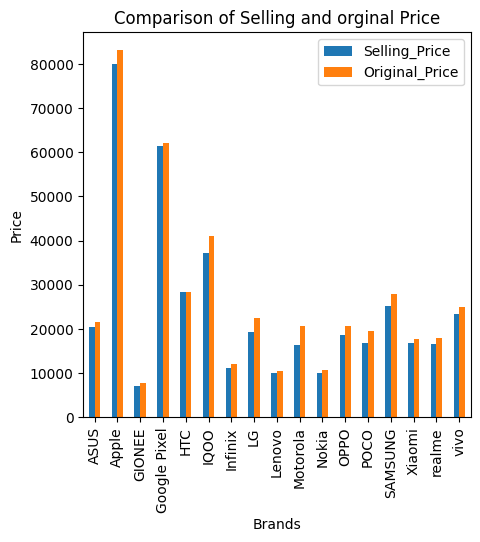

In [13]:
Brand_Sales_df.plot(kind="bar", figsize=(5,5))
plt.title("Comparison of Selling and orginal Price")
plt.ylabel("Price");

In [70]:
ASUS_df=Mobile_Sales_df[Mobile_Sales_df.Brands=="ASUS"]
ASUS_df_brands=ASUS_df.groupby("Models")[['Selling_Price', 'Original_Price','Rating',"Memory","Storage"]].mean().round(0).reset_index()
ASUS_df_brands

,Models,Selling_Price,Original_Price,Rating,Memory,Storage
0,6Z,40285.0,40285.0,4.0,6.857143,164.571429
1,ROG,26499.0,83999.0,4.0,8.0,128.0
2,ROG 5s,53999.0,59999.0,NaN,10.0,192.0
3,ROG 5s Pro,79999.0,85999.0,NaN,18.0,512.0
4,ROG Phone 3,51666.0,59999.0,4.0,10.666667,170.666667
5,ROG Phone 5,53999.0,59999.0,4.0,10.0,192.0
6,ROG Phone 5 Pro,69999.0,75999.0,NaN,16.0,512.0
7,ROG Phone 5 Ultimate,79999.0,85999.0,NaN,18.0,512.0
8,ROG Phone II,51999.0,51999.0,5.0,10.0,320.0
9,ZenFone 5Z,38719.0,38719.0,4.0,6.8,166.4


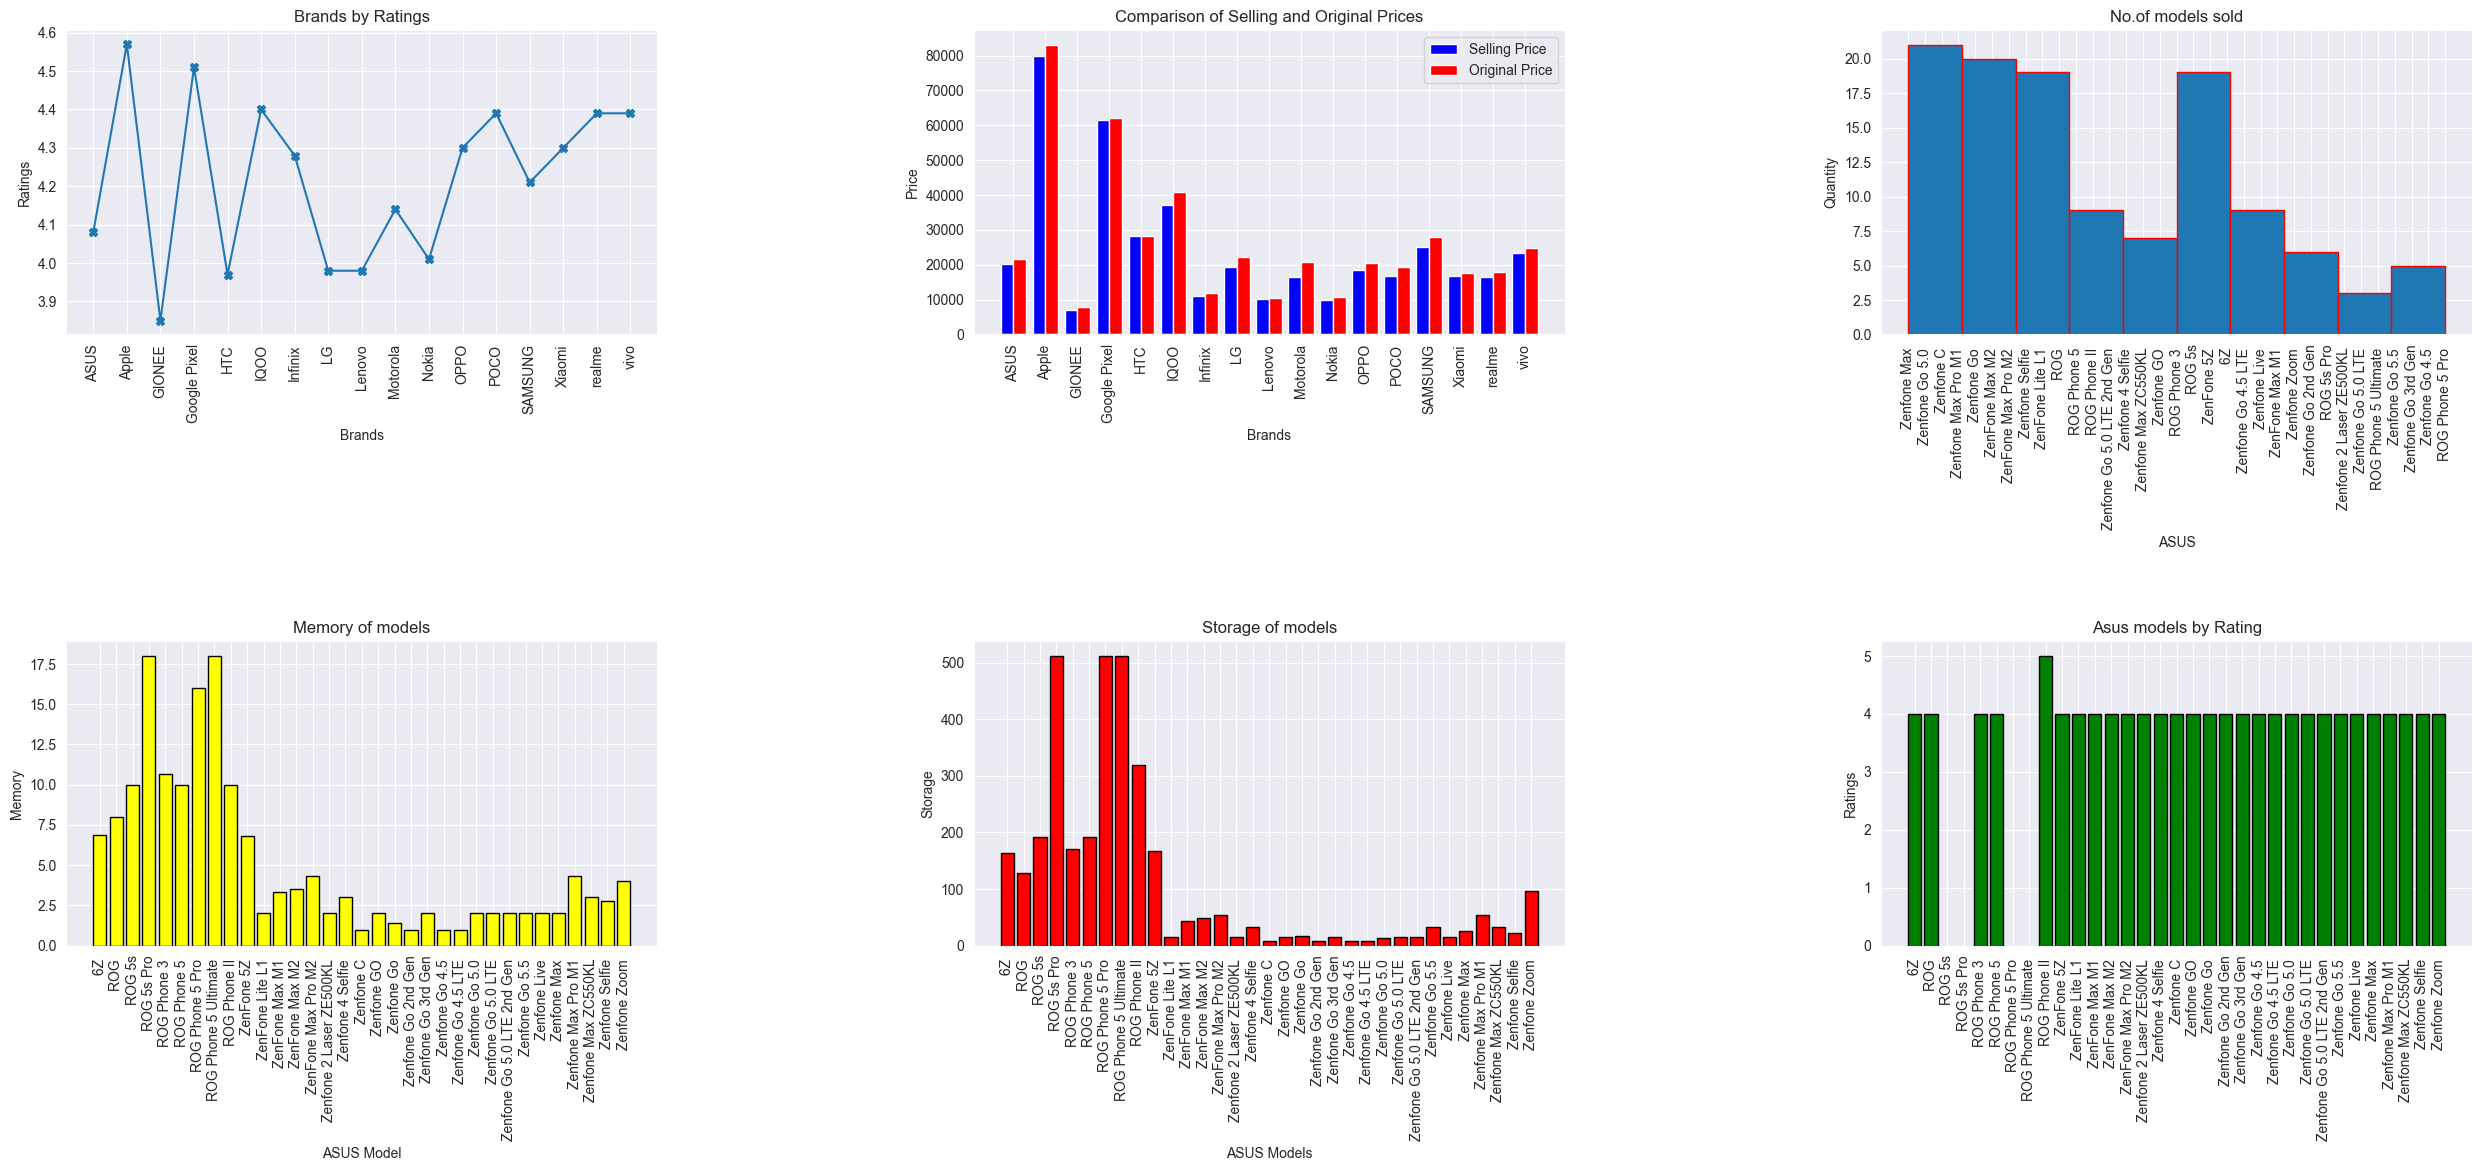

In [72]:
fig, axes=plt.subplots(2,3,figsize=(30,15))
plt.tight_layout(pad=20)


axes[0,0].plot(Brand_Rating_df,marker="X")
axes[0,0].set_title("Brands by Ratings")
axes[0,0].set_xlabel("Brands")
axes[0,0].set_ylabel("Ratings")
axes[0,0].tick_params(axis='x', rotation=90);



n = len(Brand_Sales_df)
bar_width = 0.4
index = np.arange(n)
axes[0,1].bar(index - bar_width/2, Brand_Sales_df['Selling_Price'], bar_width, label='Selling Price', color='blue')
axes[0,1].bar(index + bar_width/2, Brand_Sales_df['Original_Price'], bar_width, label='Original Price', color='red')
axes[0,1].set_xlabel('Brands')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Comparison of Selling and Original Prices')
axes[0,1].set_xticks(index)
axes[0,1].set_xticklabels(Brand_Sales_df.index, rotation=90)
axes[0,1].legend();



axes[0,2].hist(ASUS_df.Models,edgecolor="red")
axes[0,2].set_xlabel('ASUS')
axes[0,2].set_ylabel('Quantity')
axes[0,2].tick_params(axis="x",rotation=90)
axes[0,2].set_title("No.of models sold" )




axes[1,0].bar(ASUS_df_brands.Models,ASUS_df_brands.Memory,color="yellow",edgecolor="black")
axes[1,0].set_title("Memory of models")
axes[1,0].set_ylabel("Memory")
axes[1,0].set_xlabel("ASUS Model")
axes[1,0].tick_params(axis="x",rotation=90)
sns.set_style("whitegrid")

axes[1,1].bar(ASUS_df_brands.Models,ASUS_df_brands.Storage,color="red",edgecolor="black")
axes[1,1].set_title("Storage of models")
axes[1,1].set_ylabel("Storage")
axes[1,1].set_xlabel("ASUS Models")
axes[1,1].tick_params(axis="x",rotation=90)


axes[1,2].bar(ASUS_df_brands.Models,ASUS_df_brands.Rating,color="green",edgecolor="black")
axes[1,2].set_title("Asus models by Rating")
axes[1,2].set_ylabel("Ratings")
axes[1,2].tick_params(axis="x",rotation=90)



    


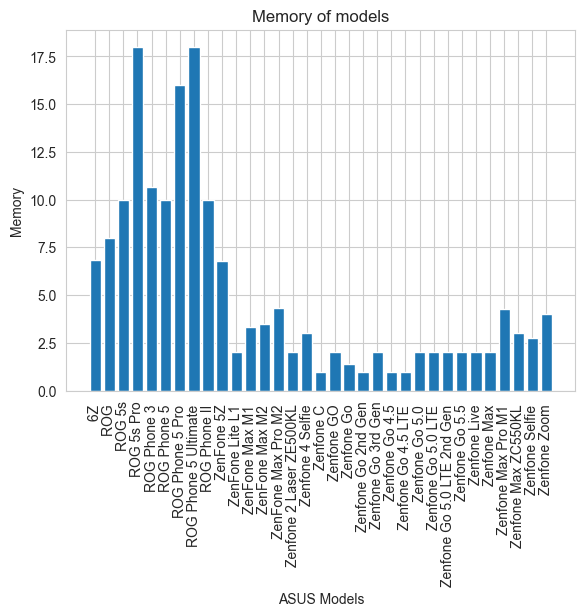

<Figure size 3000x1000 with 0 Axes>

In [73]:
plt.bar(ASUS_df_brands.Models,ASUS_df_brands.Memory)
plt.xlabel("ASUS Models")
plt.ylabel("Memory")
plt.title("Memory of models")
plt.tight_layout(pad=2)
plt.xticks(rotation=90)
plt.figure(figsize=(30,10));

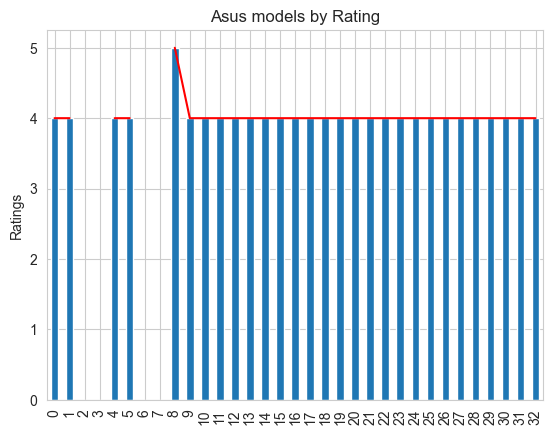

In [74]:
ASUS_df_brands.Rating.plot(kind="bar")
ASUS_df_brands.Rating.plot(color="red")
plt.title("Asus models by Rating")
plt.ylabel("Ratings")
plt.xticks(rotation=90);

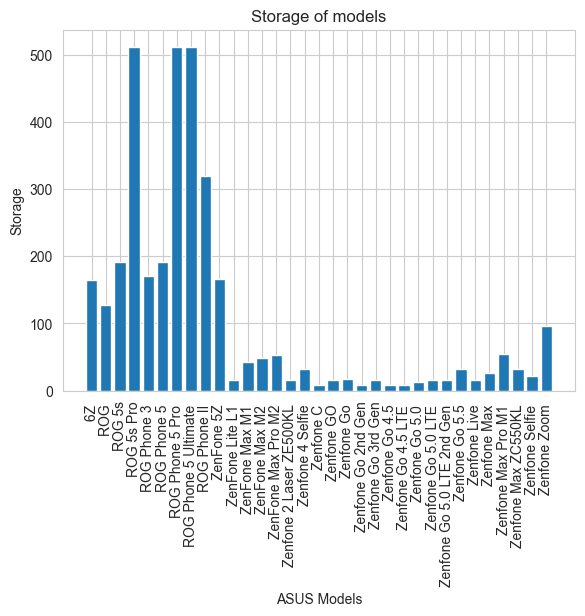

<Figure size 3000x1000 with 0 Axes>

In [75]:
plt.bar(ASUS_df_brands.Models,ASUS_df_brands.Storage)
plt.xlabel("ASUS Models")
plt.ylabel("Storage")
plt.title("Storage of models")
plt.tight_layout(pad=2)
plt.xticks(rotation=90)
plt.figure(figsize=(30,10));

In [76]:
APPLE_df=Mobile_Sales_df[Mobile_Sales_df.Brands=="Apple"]
APPLE_df_brands=APPLE_df.groupby("Models")[['Selling_Price', 'Original_Price','Rating',"Memory","Storage"]].mean().round(0).reset_index()
APPLE_df_brands


,Models,Selling_Price,Original_Price,Rating,Memory,Storage
0,iPhone 11,56706.0,56706.0,5.0,4.0,149.333333
1,iPhone 11 Pro,110881.0,122033.0,5.0,4.0,304.761905
2,iPhone 11 Pro Max,131708.0,131708.0,5.0,4.0,256.0
3,iPhone 12,70666.0,74900.0,5.0,4.0,149.333333
4,iPhone 12 Mini,63666.0,67122.0,4.0,4.0,149.333333
5,iPhone 12 Pro,121718.0,121718.0,5.0,6.0,279.272727
6,iPhone 13,101567.0,102122.0,5.0,4.0,412.444444
7,iPhone 13 Mini,86329.0,86329.0,NaN,4.857143,338.285714
8,iPhone 13 Pro,149900.0,149900.0,5.0,4.0,512.0
9,iPhone 13 Pro,148233.0,148233.0,NaN,6.0,576.0


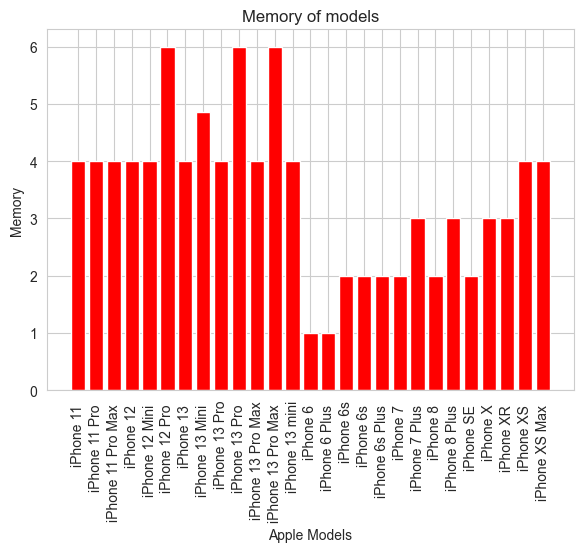

<Figure size 3000x1000 with 0 Axes>

In [53]:
plt.bar(APPLE_df_brands.Models,APPLE_df_brands.Memory,color="red")
plt.xlabel("Apple Models")
plt.ylabel("Memory")
plt.title("Memory of models")
plt.tight_layout(pad=2)
plt.xticks(rotation=90)
plt.figure(figsize=(30,10));

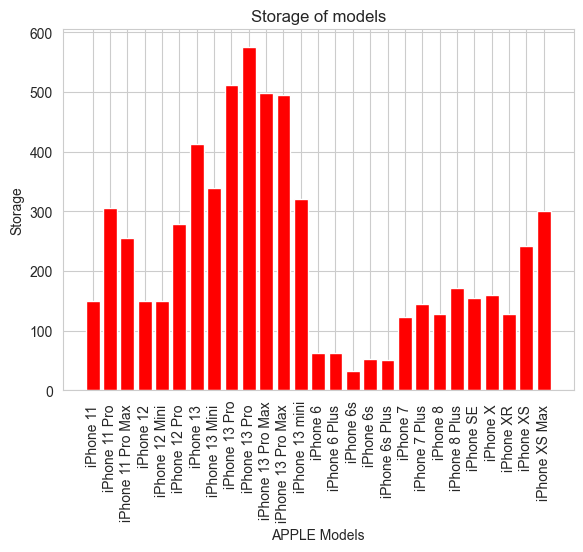

<Figure size 3000x1000 with 0 Axes>

In [54]:
plt.bar(APPLE_df_brands.Models,APPLE_df_brands.Storage,color="red")
plt.xlabel("APPLE Models")
plt.ylabel("Storage")
plt.title("Storage of models")
plt.tight_layout(pad=2)
plt.xticks(rotation=90)
plt.figure(figsize=(30,10));

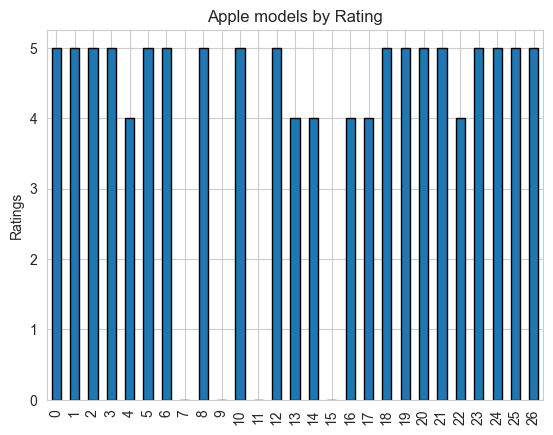

In [55]:
APPLE_df_brands.Rating.plot(kind="bar",edgecolor="black")
plt.title("Apple models by Rating")
plt.ylabel("Ratings")
plt.xticks(rotation=90)
sns.set_style("darkgrid");

In [56]:
GIONEE_df=Mobile_Sales_df[Mobile_Sales_df.Brands=="GIONEE"]
GIONEE_df_brands=GIONEE_df.groupby("Models")[['Selling_Price', 'Original_Price','Rating',"Memory","Storage"]].mean().round(0).reset_index()
GIONEE_df_brands

,Models,Selling_Price,Original_Price,Rating,Memory,Storage
0,A1,12358.0,12799.0,4.0,4.0,64.0
1,A1 Lite,11499.0,11499.0,4.0,3.0,32.0
2,A1 Plus,12499.0,12499.0,4.0,4.0,64.0
3,Ctrl V4S,3999.0,3999.0,4.0,1.0,8.0
4,Ctrl V5,4790.0,4790.0,4.0,8.0,0.0
...,...,...,...,...,...,...
56,S6S,15999.0,15999.0,4.0,3.0,32.0
57,S96,2246.0,2546.0,4.0,0.0,0.0
58,V4S,3499.0,3499.0,4.0,1.0,8.0
59,X-1,4900.0,4900.0,4.0,2.0,16.0


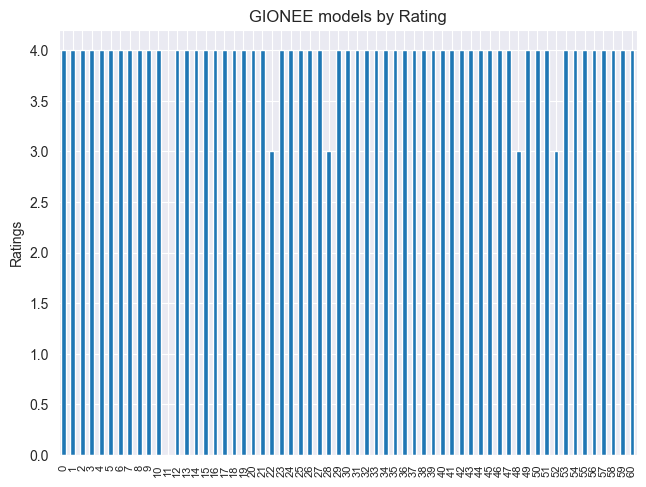

<Figure size 400x200 with 0 Axes>

In [57]:
GIONEE_df_brands.Rating.plot(kind="bar")
plt.tight_layout()
plt.xticks(fontsize=8)
plt.title("GIONEE models by Rating")
plt.ylabel("Ratings")
plt.figure(figsize=(4,2));

In [58]:
Google_Pixel_df=Mobile_Sales_df[Mobile_Sales_df.Brands=="Google Pixel"]
Google_Pixel_df_brands=Google_Pixel_df.groupby("Models")[['Selling_Price', 'Original_Price','Rating',"Memory","Storage"]].mean().round(0).reset_index()
Google_Pixel_df_brands

,Models,Selling_Price,Original_Price,Rating,Memory,Storage
0,2,67000.0,67000.0,5.0,4.0,106.666667
1,2 XL,82000.0,82000.0,5.0,4.0,128.0
2,3,75333.0,75333.0,4.0,4.0,96.0
3,3 XL,87500.0,87500.0,5.0,4.0,96.0
4,3a,39999.0,39999.0,4.0,4.0,64.0
5,3a XL,44999.0,44999.0,4.0,4.0,64.0
6,4a,31999.0,31999.0,4.0,6.0,128.0
7,Nexus 5X,23874.0,27472.0,4.0,2.0,19.2
8,Quite Black,66000.0,66000.0,4.0,4.0,128.0
9,Very Silver,57000.0,57000.0,4.0,4.0,32.0


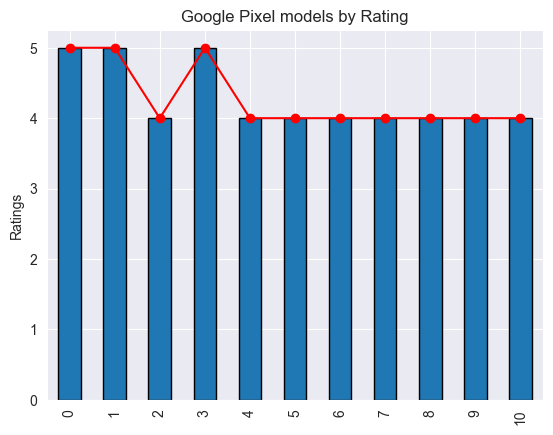

In [59]:
Google_Pixel_df_brands.Rating.plot(kind="bar",edgecolor="black")
plt.plot(Google_Pixel_df_brands.Rating,"o-r")
plt.title("Google Pixel models by Rating")
plt.ylabel("Ratings");

In [60]:
IQOO_df=Mobile_Sales_df[Mobile_Sales_df.Brands=="IQOO"]
IQOO_df_brands=IQOO_df.groupby("Models")[['Selling_Price', 'Original_Price','Rating',"Memory","Storage"]].mean().round(0).reset_index()
IQOO_df_brands

,Models,Selling_Price,Original_Price,Rating,Memory,Storage
0,3,37190.0,40990.0,4.0,8.8,204.8


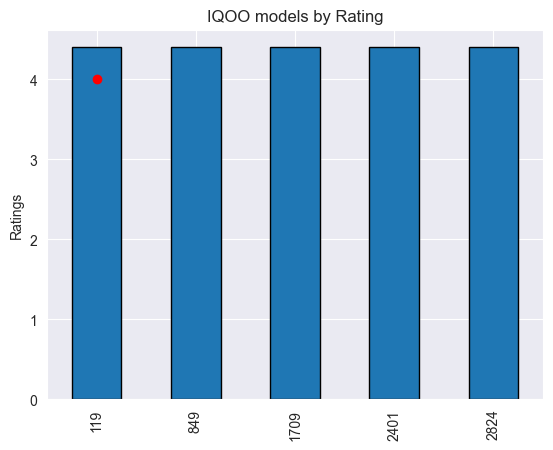

In [61]:
IQOO_df.Rating.plot(kind="bar",edgecolor="black")
plt.plot(IQOO_df_brands.Rating,"o-r")
plt.title("IQOO models by Rating")
plt.ylabel("Ratings");

In [62]:
Mobile_Sales_df[Mobile_Sales_df.Brands=="IQOO"]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling_Price,Original_Price,Mobile,Discount,discount_percentage
119,IQOO,3,Quantum Silver,8,256,Yes,4.4,37990,40990,IQOO 3,3000,7
849,IQOO,3,Tornado Black,8,256,Yes,4.4,37990,40990,IQOO 3,3000,7
1709,IQOO,3,Tornado Black,8,128,Yes,4.4,34990,37990,IQOO 3,3000,7
2401,IQOO,3,Quantum Silver,8,128,Yes,4.4,34990,37990,IQOO 3,3000,7
2824,IQOO,3,Tornado Black,12,256,Yes,4.4,39990,46990,IQOO 3,7000,14


''

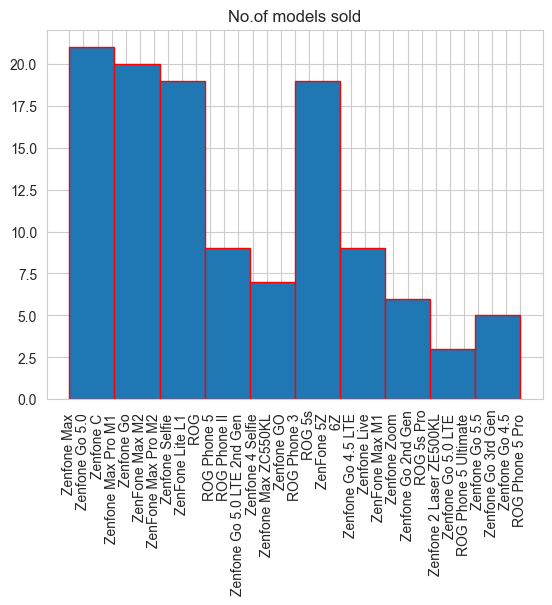

In [77]:
plt.hist(ASUS_df.Models,edgecolor="red")
plt.xticks(rotation=90)
plt.title("No.of models sold" )
;

In [65]:
Brand_df=Mobile_Sales_df.groupby("Brands")[['Rating','Selling_Price', 'Original_Price']].mean().round(2).reset_index()
Brand_df

,Brands,Rating,Selling_Price,Original_Price
0,ASUS,4.08,20326.92,21585.39
1,Apple,4.57,80001.66,83076.49
2,GIONEE,3.85,7135.09,7818.61
3,Google Pixel,4.51,61391.86,62012.21
4,HTC,3.97,28314.38,28314.38
5,IQOO,4.40,37190.00,40990.00
6,Infinix,4.28,11092.18,12018.09
7,LG,3.98,19323.18,22367.78
8,Lenovo,3.98,10083.84,10350.51
9,Motorola,4.14,16357.47,20681.36


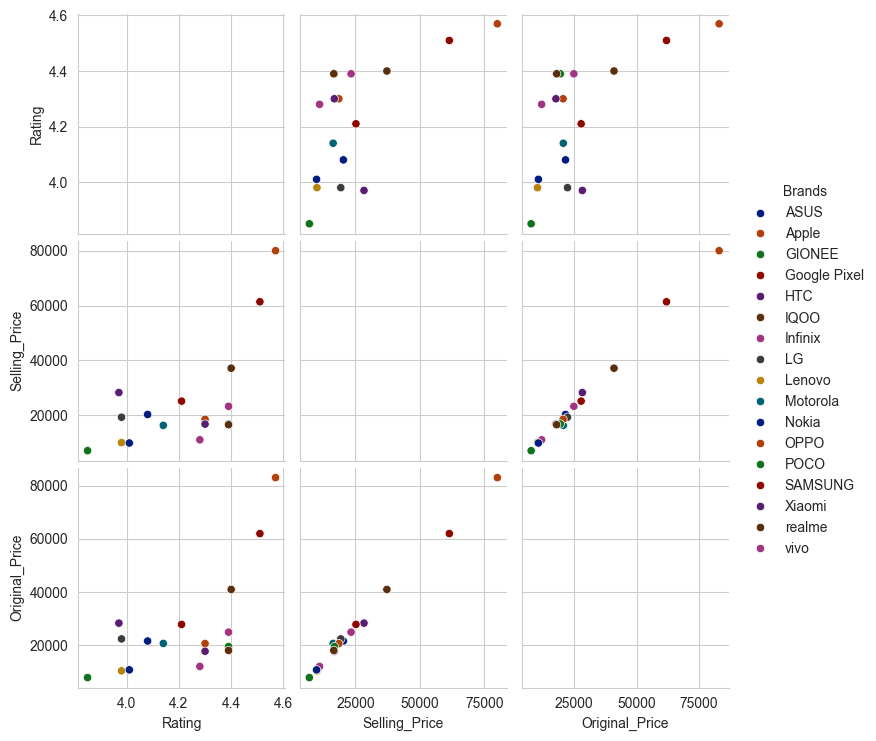

In [81]:
sns.pairplot(Brand_df, hue="Brands", palette='dark')

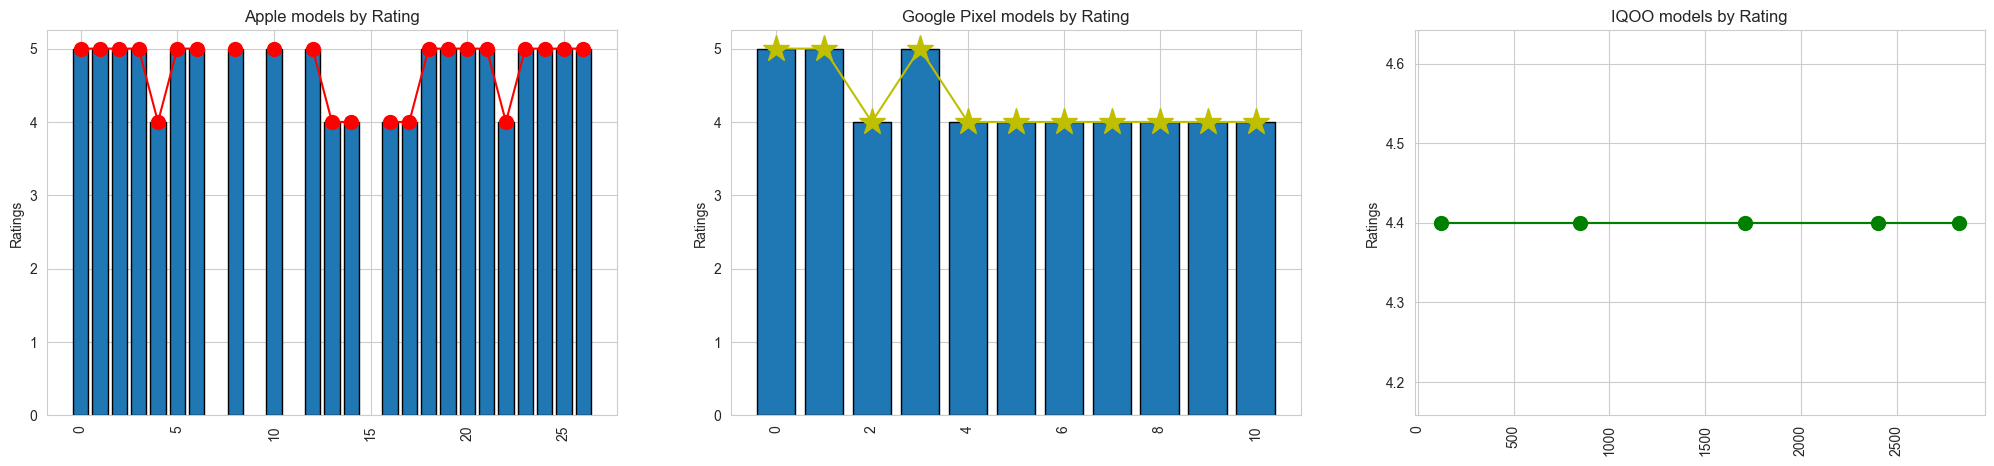

In [44]:
fig, axes=plt.subplots(1,3,figsize=(25,5))

axes[0].bar(APPLE_df_brands.index,APPLE_df_brands.Rating,edgecolor="black")
axes[0].set_title("Apple models by Rating")
axes[0].set_ylabel("Ratings")
axes[0].tick_params(axis="x",rotation=90)
axes[0].plot(APPLE_df_brands.Rating,".-r",markersize=20)
sns.set_style("whitegrid")


axes[1].bar(Google_Pixel_df_brands.index,Google_Pixel_df_brands.Rating,edgecolor="black")
axes[1].set_title("Google Pixel models by Rating")
axes[1].set_ylabel("Ratings")
axes[1].tick_params(axis="x",rotation=90)
axes[1].plot(Google_Pixel_df_brands.Rating,"*-y",markersize=20)


axes[2].plot(IQOO_df.index,IQOO_df.Rating,color="green")
axes[2].set_title("IQOO models by Rating")
axes[2].set_ylabel("Ratings")
axes[2].tick_params(axis="x",rotation=90)
axes[2].plot(IQOO_df.Rating,".-g",markersize=20);